In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import importlib
import euler_utils
import plotting_utils
importlib.reload(euler_utils)
importlib.reload(plotting_utils)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


<module 'plotting_utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/WaitTimeValidation/plotting_utils.py'>

In [3]:
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'

In [4]:
data_test_average = euler_utils.read_output(scratch_folder + 'test_pop/average')

100%|██████████| 51/51 [00:02<00:00, 20.99it/s]


In [5]:
data_test_median = euler_utils.read_output(scratch_folder + 'test_pop/median')

100%|██████████| 51/51 [00:02<00:00, 21.58it/s]


In [6]:
data_test_divSums = euler_utils.read_output(scratch_folder + 'test_pop/divSums')

100%|██████████| 51/51 [00:02<00:00, 21.10it/s]


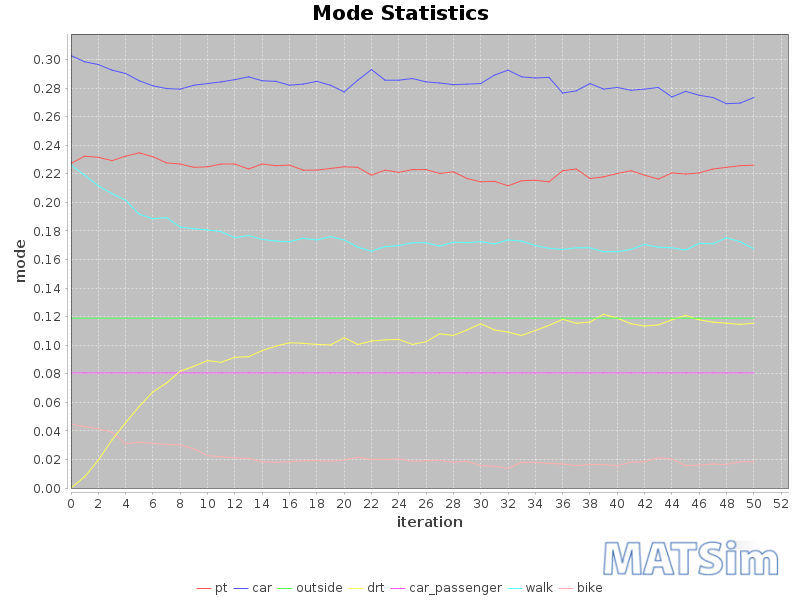

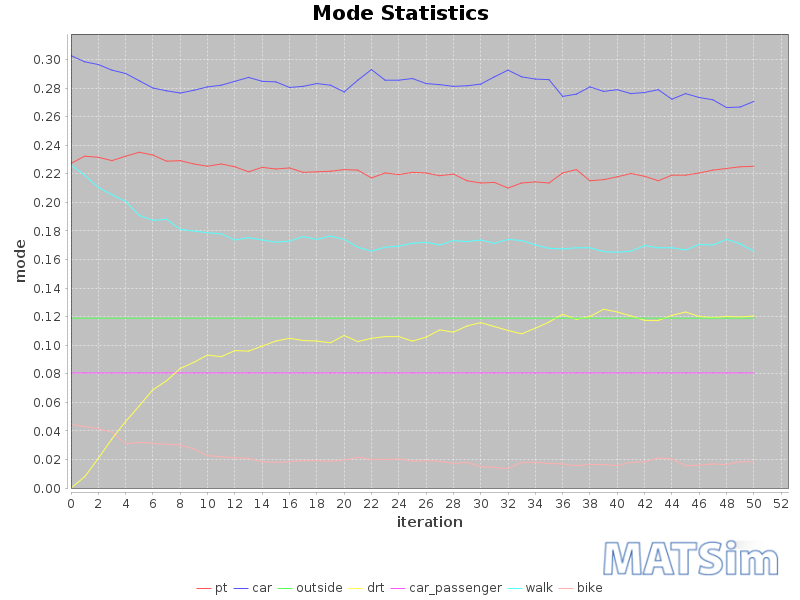

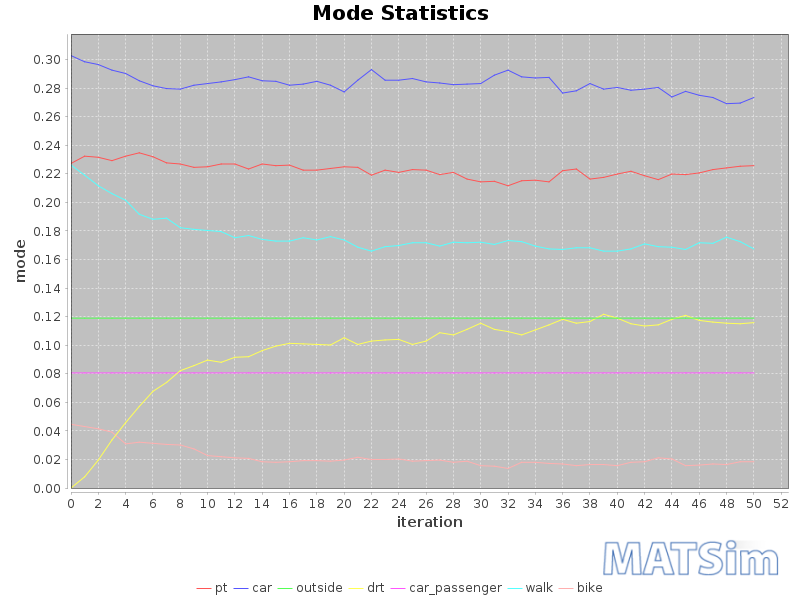

In [7]:
display(plotting_utils.show_modeshare(scratch_folder + 'test_pop/average'))
display(plotting_utils.show_modeshare(scratch_folder + 'test_pop/median'))
display(plotting_utils.show_modeshare(scratch_folder + 'test_pop/divSums'))


average


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
0,276.0,3869.927395,4318.13299,57.355331,770.44687,2104.256185,5795.582779,9896.118586,13745.105576,17046.388331,22483.637119


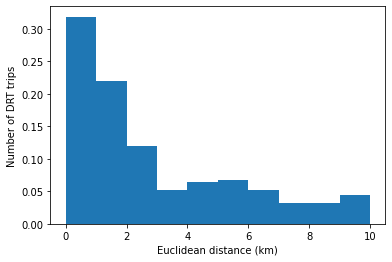

median


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
0,289.0,3862.942721,4365.335085,57.355331,770.44687,2096.809377,5718.169142,9870.258243,14061.758664,16731.368425,22483.637119


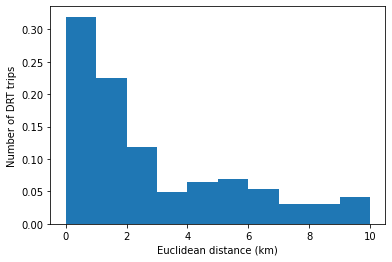

divSums


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
0,277.0,3911.195131,4364.68232,57.355331,770.44687,2104.256185,5807.680913,9939.262532,13840.274279,16988.369573,22483.637119


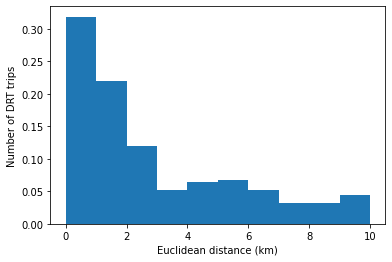

In [8]:
print('average')
plotting_utils.plot_euclidean_distance_ditribution(data_test_average)

print('median')
plotting_utils.plot_euclidean_distance_ditribution(data_test_median)

print('divSums')
plotting_utils.plot_euclidean_distance_ditribution(data_test_divSums)


In [9]:
avg_delay_factor_feedback = [df.avg[1] for df in data_test_average['global_avg']]
median_delay_factor_feedback = [df['median'][1] for df in data_test_median['global_avg']]
divSums_delay_factor_feedback = [df.avg[1] for df in data_test_divSums['global_avg']]

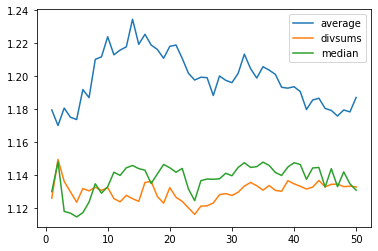

In [10]:
plt.plot(avg_delay_factor_feedback, label='average')
plt.plot(divSums_delay_factor_feedback, label='divsums')
plt.plot(median_delay_factor_feedback, label='median')

plt.legend()
plt.show()

In [11]:
avg_waitTime_feedback = [df.avg[0]/ 60 for df in data_test_average['global_avg']]
median_waitTime_feedback = [df['median'][0] / 60 for df in data_test_median['global_avg']]
divSums_waitTime_feedback = [df.avg[0] / 60 for df in data_test_divSums['global_avg']]

In [12]:
data_test_average['global_avg'][-1]

,stat,avg,median,min,p_5,p_25,p_75,p_95,max
0,waitTime,77.931159,45.000000,31.000000,31.000000,31.000000,88.000000,276.60000,506.000000
1,delayFactor,1.187102,1.124156,1.004882,1.024427,1.074498,1.238904,1.53347,2.449506


In [13]:
data_test_divSums['global_avg'][-1]

,stat,avg,median,min,p_5,p_25,p_75,p_95,max
0,waitTime,77.888087,45.0,31.0,31.0,31.0,88.0,276.4,506.0
1,delayFactor,1.132722,NaN,NaN,NaN,NaN,NaN,NaN,NaN


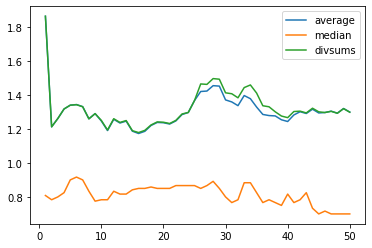

In [14]:
plt.plot(avg_waitTime_feedback, label='average')
plt.plot(median_waitTime_feedback, label='median')
plt.plot(divSums_waitTime_feedback, label='divsums')

plt.legend()
plt.show()